In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [18]:
print(data.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [19]:
X = data.drop('target', axis=1)
y = data['target']

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=5)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Accuracy in %:", round(metrics.accuracy_score(y_test, y_pred) * 100), "%")

Confusion Matrix:
 [[83 20]
 [ 5 97]]
Accuracy: 0.8780487804878049
Accuracy in %: 88 %


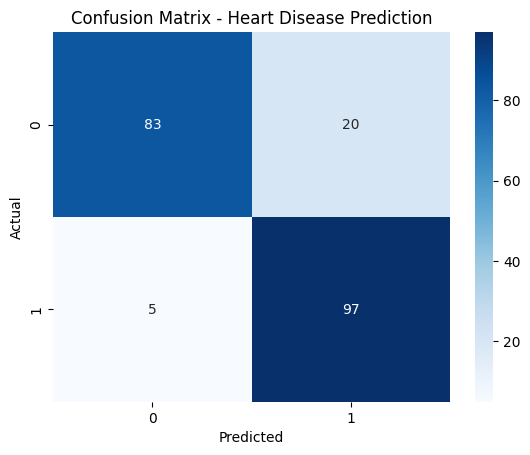

In [29]:
conf_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()